In [1]:
import pandas as pd
# import seaborn as sns
# import seaborn.apionly as sns

import numpy as np
# sns.set(color_codes=True, font_scale=2, style="whitegrid", palette="muted")

import matplotlib.pyplot as plt
import pickle
%matplotlib inline

# No. flipping until prediction changed

In [2]:
def architecture_idx(a):
    if a == 's2':
        return 1
    elif a == 's3':
        return 2
    elif a =='deep_4l':
        return 3
    elif a == 'convdeep_4l':
        return 4

getting data from ../stats/rel-dist-mnist-3-digits.pkl
getting data from ../stats/rel-dist-fashion-mnist-3-items.pkl


/Users/heytitle/projects/heatmapping-tutorial/venv/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


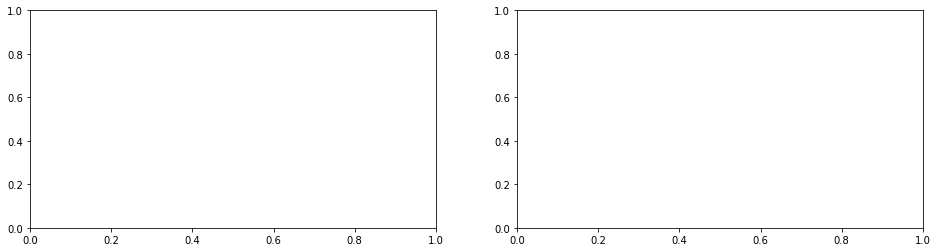

In [37]:
def plot_relevance_dist_at_between_timestep_matplotlib(datasets=['mnist-3-digits'], between=(4,8)):
    results = []
    for dataset in datasets :
        file = "../stats/rel-dist-%s.pkl" %(dataset)
        print('getting data from %s' % file)
        results = results + pickle.load(open(file, "rb"))
        
    df = pd.DataFrame(results)
    def compute_dist(row):

        return np.sum(row['rel_dist'][between[0]:between[1]])
    
    df['architecture_idx'] = df['architecture'].apply(architecture_idx)

    col_name = 'dist'
    df[col_name] = df.apply(compute_dist, axis=1)
    

    fig = plt.figure(figsize=(16,4))
    ax1 = fig.add_subplot(1,2,1, aspect = "equal")
    ax2 = fig.add_subplot(1,2,2, aspect = "equal", sharey = ax1)
    plt.setp(ax2.get_yticklabels(), visible=False)

    axes = [ax1, ax2]
    count = 1
    for d in datasets:
        for m in ['sensitivity', 'guided_backprop', 'lrp_alpha2_beta1']:
            plt.subplot(1, 2, count)
            dd = df[(df.method == m) & (df.dataset == d)]
            if m == 'sensitivity':
                ls = '--'
            else:
                ls = '-'
            
            if m == 'guided_backprop':
                mk = 's'
            elif 'lrp' in m:
                mk = 'o'
            else:
                mk = '.'
            pp = axes[count-1]
            pp.set_title(d)
#             pp.plot(dd.architecture_idx, dd.dist, linestyle=ls, marker=mk, label=m)
#             pp.set_xticks(range(1,5), ['Shallow', 'Deep', 'DeepV2', 'ConvDeep'])
        count = count + 1

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
plot_relevance_dist_at_between_timestep_matplotlib(['mnist-3-digits', 'fashion-mnist-3-items'])

In [29]:
np.linspace(0,1, 5)

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ])

In [19]:
dd = pickle.load(open('../stats/rel-dist-fashion-mnist-3-items.pkl', "rb"))

In [20]:
dd

[{'architecture': 's2',
  'dataset': 'fashion-mnist-3-items',
  'method': 'sensitivity',
  'rel_dist': array([ 0.03469579,  0.04009188,  0.05370434,  0.07468984,  0.13050603,
          0.21856762,  0.17556888,  0.10447065,  0.06158287,  0.04987809,
          0.03674397,  0.01950004]),
  'seq': 12,
  'std': array([ 0.03354895,  0.02734787,  0.02787766,  0.0335786 ,  0.03973968,
          0.05753617,  0.04786476,  0.03455771,  0.02460244,  0.02295017,
          0.0190281 ,  0.01079227])},
 {'architecture': 's2',
  'dataset': 'fashion-mnist-3-items',
  'method': 'simple_taylor',
  'rel_dist': array([ 0.0615688 ,  0.0508789 ,  0.05830495,  0.0944162 ,  0.14048784,
          0.12935221,  0.11022744,  0.11906012,  0.08861209,  0.05490919,
          0.04634844,  0.04583384]),
  'seq': 12,
  'std': array([ 0.02582755,  0.02144766,  0.02233646,  0.02352711,  0.02970023,
          0.03762163,  0.0314027 ,  0.02790864,  0.0221564 ,  0.02017089,
          0.01760428,  0.01424686])},
 {'architectur